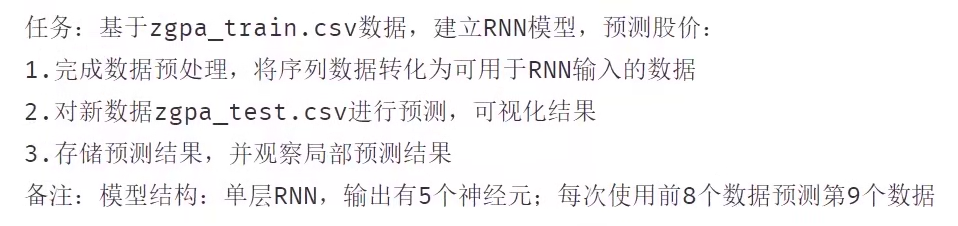

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("D:/project/dataset/zgpa/zgpa_train.csv")
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [2]:
price = data.loc[:,'close']
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

### 归一化处理

In [3]:
price_normal = price / max(price)
print(price_normal)

0      0.383273
1      0.389266
2      0.389666
3      0.379545
4      0.381808
         ...   
726    0.751099
727    0.750566
728    0.738447
729    0.733120
730    0.722466
Name: close, Length: 731, dtype: float64


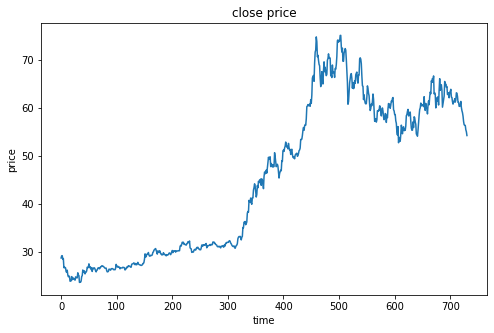

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(figsize=(8, 5))
plt.plot(price)
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

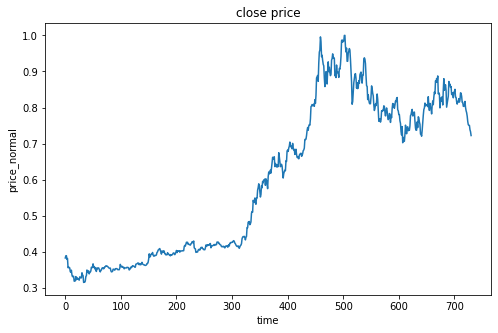

In [5]:
fig2 = plt.figure(figsize=(8, 5))
plt.plot(price_normal)
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price_normal")
plt.show()

### 定义x和y

In [6]:
def extract_data(data, time_step):
    X = []
    y = []
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X = np.array(X)
    y = np.array(y)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X, y

In [7]:
time_step = 8
X, y = extract_data(price_normal, time_step)
print(X.shape)
print(y.shape)

(723, 8, 1)
(723,)


### 建立模型

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=5, input_shape=(time_step, 1), activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### 训练模型

In [9]:
%%time
model.fit(X, y, batch_size=30, epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 1ms/step - loss: 0.6757 - accuracy: 0.0000e+00
Epoch 2/200
25/25 [==============================] - 0s 956us/step - loss: 0.3379 - accuracy: 0.0000e+00
Epoch 3/200
25/25 [==============================] - 0s 914us/step - loss: 0.1160 - accuracy: 0.0000e+00
Epoch 4/200
25/25 [==============================] - 0s 914us/step - loss: 0.0246 - accuracy: 0.0012
Epoch 5/200
25/25 [==============================] - 0s 914us/step - loss: 0.0085 - accuracy: 6.9323e-04
Epoch 6/200
25/25 [==============================] - 0s 914us/step - loss: 0.0081 - accuracy: 0.0016
Epoch 7/200
25/25 [==============================] - 0s 914us/step - loss: 0.0076 - accuracy: 3.9898e-04
Epoch 8/200
25/25 [==============================] - 0s 956us/step - loss: 0.0072 - accuracy: 0.0037
Epoch 9/200
25/25 [==============================] - 0s 914us/step - loss: 0.0069 - accuracy: 6.1310e-04
Epoch 10/200
25/25 [==============================] - 0s 914us/step -

### 训练集上的预测

In [10]:
y_train_predict = model.predict(X) * max(price)
y_train = y * max(price)

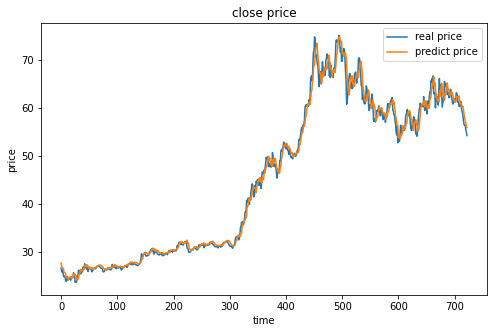

In [11]:
fig3 = plt.figure(figsize=(8, 5))
plt.plot(y_train, label='real price')
plt.plot(y_train_predict, label='predict price')
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

### 测试集上的预测

In [12]:
data_test = pd.read_csv("D:/project/dataset/zgpa/zgpa_test.csv")
data_test.head()

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2020-07-24,78.88,78.89,77.00,76.38,1072693.38,-2.00,-2.53,79.898,79.961,79.539,1002925.93,1029867.65,1261360.37
1,2020-07-23,79.00,79.88,79.00,78.02,782100.44,-0.93,-1.16,80.102,80.495,79.302,963394.30,1069260.28,1237982.51
2,2020-07-22,80.21,81.85,79.93,79.44,877513.25,-0.83,-1.03,79.946,81.187,78.950,1070608.21,1133509.96,1237859.29
3,2020-07-21,82.95,83.20,80.76,80.37,904774.81,-2.04,-2.46,80.004,81.763,78.592,1079659.15,1215397.62,1227575.20
4,2020-07-20,79.05,82.82,82.80,79.05,1377547.75,4.78,6.13,80.112,82.009,78.225,1096415.78,1347124.29,1214135.95


In [13]:
price_test = data_test.loc[:,'close']
price_test.head()

price_test_normal = price_test / max(price)
X_test_normal, y_test_normal = extract_data(price_test_normal, time_step)
print(X_test_normal.shape, y_test_normal.shape)

(127, 8, 1) (127,)


In [14]:
y_test_predict = model.predict(X_test_normal) * max(price)
y_test= y_test_normal * max(price)

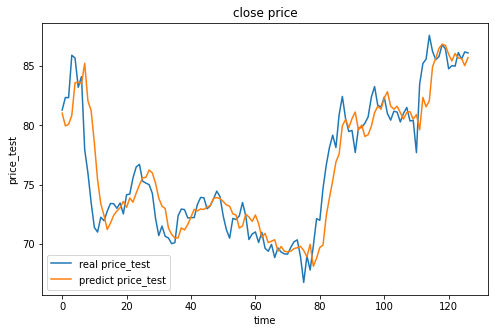

In [15]:
fig4 = plt.figure(figsize=(8, 5))
plt.plot(y_test, label='real price_test')
plt.plot(y_test_predict, label='predict price_test')
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price_test")
plt.legend()
plt.show()

In [16]:
result_y_test = y_test.reshape(-1, 1)
result_y_test_predict = y_test_predict
print(result_y_test.shape, result_y_test_predict.shape)

result = np.concatenate((result_y_test, result_y_test_predict), axis=1)
print(result.shape)

result = pd.DataFrame(result, columns=["real_test_price", "predict_test_price"])
result.to_csv("D:/project/dataset/zgpa/zgpa_predict.csv")

(127, 1) (127, 1)
(127, 2)
